In [3]:
import PIL
from PIL import Image
import os
import sys
import numpy as np

In [2]:
read_path = '/home/rozenberszki/project/panoptic-lifting/data/replica/room_0/color'
write_path = '/home/rozenberszki/project/wsnsl/Datasets/Replica/room0_panoptic/color'

In [3]:
# Get all .jpg files in the read_path
jpg_files = [f for f in os.listdir(read_path) if f.endswith('.jpg')]

for jpg_file in jpg_files:
    # Open the .jpg file
    img = Image.open(os.path.join(read_path, jpg_file))
    
    # Convert the image to .png
    png_file = 'frame00' + jpg_file[-8:]
    
    # Save the .png file to the write_path
    img.save(os.path.join(write_path, png_file))


In [48]:
read_path = '/home/rozenberszki/project/panoptic-lifting/data/replica/room_0/depth'
write_path = '/home/rozenberszki/project/wsnsl/Datasets/Replica/room0_panoptic/results'

In [49]:
# Get all .jpg files in the read_path
png_files = [f for f in os.listdir(read_path) if f.endswith('.png')]

for file in png_files:
    # Open the .jpg file
    img = Image.open(os.path.join(read_path, file))
    img = np.array(img)*5
    img = Image.fromarray(img)
    # Convert the image to .png
    png_file = 'depth00' + file[-8:-4] + '.png'
    
    # Save the .png file to the write_path
    img.save(os.path.join(write_path, png_file))

KeyboardInterrupt: 

In [133]:
nerf_poses = '/home/rozenberszki/project/Replica_Dataset/room_0/Sequence_1/traj_w_c.txt'
nposes = np.loadtxt(nerf_poses)
nposes.shape

(900, 16)

In [134]:
nposes= nposes.reshape(-1,4,4)

In [135]:
nposes = np.array([np.linalg.inv(pose) for pose in nposes])


In [136]:
nposes = nposes.reshape(-1,16)

In [137]:
np.savetxt('/home/rozenberszki/project/wsnsl/Datasets/Replica/room0_panoptic/traj.txt', nposes)


In [114]:
"""import pickle
with open('/home/rozenberszki/project/panoptic-lifting/data/replica/room_0/trajectories/trajectory_00.pkl', 'rb') as file:
    trajectory = pickle.load(file)"""
pose_path = '/home/rozenberszki/project/panoptic-lifting/data/replica/room_0/pose'
pose_store = '/home/rozenberszki/project/wsnsl/Datasets/Replica/room0_panoptic/traj.txt'

In [115]:
pose_files = sorted([f for f in os.listdir(pose_path) if f.endswith('.txt')])
pose_files

['0_0000.txt',
 '0_0001.txt',
 '0_0002.txt',
 '0_0003.txt',
 '0_0004.txt',
 '0_0005.txt',
 '0_0006.txt',
 '0_0007.txt',
 '0_0008.txt',
 '0_0009.txt',
 '0_0010.txt',
 '0_0011.txt',
 '0_0012.txt',
 '0_0013.txt',
 '0_0014.txt',
 '0_0015.txt',
 '0_0016.txt',
 '0_0017.txt',
 '0_0018.txt',
 '0_0019.txt',
 '0_0020.txt',
 '0_0021.txt',
 '0_0022.txt',
 '0_0023.txt',
 '0_0024.txt',
 '0_0025.txt',
 '0_0026.txt',
 '0_0027.txt',
 '0_0028.txt',
 '0_0029.txt',
 '0_0030.txt',
 '0_0031.txt',
 '0_0032.txt',
 '0_0033.txt',
 '0_0034.txt',
 '0_0035.txt',
 '0_0036.txt',
 '0_0037.txt',
 '0_0038.txt',
 '0_0039.txt',
 '0_0040.txt',
 '0_0041.txt',
 '0_0042.txt',
 '0_0043.txt',
 '0_0044.txt',
 '0_0045.txt',
 '0_0046.txt',
 '0_0047.txt',
 '0_0048.txt',
 '0_0049.txt',
 '0_0050.txt',
 '0_0051.txt',
 '0_0052.txt',
 '0_0053.txt',
 '0_0054.txt',
 '0_0055.txt',
 '0_0056.txt',
 '0_0057.txt',
 '0_0058.txt',
 '0_0059.txt',
 '0_0060.txt',
 '0_0061.txt',
 '0_0062.txt',
 '0_0063.txt',
 '0_0064.txt',
 '0_0065.txt',
 '0_0066.t

In [116]:
poses = [np.loadtxt(os.path.join(pose_path, p)).flatten()[None] for p in pose_files]
poses

[array([[-0.3837331 ,  0.05730035,  0.92166457, -1.18566512, -0.92344405,
         -0.02381091, -0.38299365,  0.95222534,  0.        , -0.998073  ,
          0.0620507 ,  1.0811092 ,  0.        ,  0.        ,  0.        ,
          1.        ]]),
 array([[-0.3900752 ,  0.04718616,  0.91957316, -1.20250871, -0.920783  ,
         -0.01998967, -0.38956267,  0.96065546,  0.        , -0.99868608,
          0.05124569,  1.08342166,  0.        ,  0.        ,  0.        ,
          1.        ]]),
 array([[-0.3951234 ,  0.03720576,  0.9178743 , -1.22007942, -0.91862805,
         -0.01600307, -0.39479919,  0.96775515,  0.        , -0.99917948,
          0.04050145,  1.08635878,  0.        ,  0.        ,  0.        ,
          1.        ]]),
 array([[-0.39893326,  0.02738066,  0.91657108, -1.23833951, -0.91697996,
         -0.01191199, -0.39875538,  0.97355442,  0.        , -0.9995541 ,
          0.02985961,  1.08989866,  0.        ,  0.        ,  0.        ,
          1.        ]]),
 array([[-0.

In [117]:
poses = np.concatenate(poses, axis=0)
poses.shape

(900, 16)

In [118]:

poses = poses.reshape(-1,4,4)

In [125]:
np.average(np.abs(poses - nposes), axis = 0)


array([[0.        , 0.        , 0.        , 3.00290567],
       [0.        , 0.        , 0.        , 1.16313601],
       [0.        , 0.        , 0.        , 1.52736306],
       [0.        , 0.        , 0.        , 0.        ]])

In [99]:
poses = [np.linalg.inv(pose) for pose in poses]

In [100]:
poses[0]

array([[-0.3837331 , -0.92344405, -0.        ,  0.42434787],
       [ 0.05730035, -0.02381091, -0.998073  ,  1.16963828],
       [ 0.92166457, -0.38299365,  0.0620507 ,  1.3903982 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [101]:
poses = np.array(poses)
poses.shape

(900, 4, 4)

In [102]:
poses = poses.reshape(900,4,4)
poses[0]

array([[-0.3837331 , -0.92344405, -0.        ,  0.42434787],
       [ 0.05730035, -0.02381091, -0.998073  ,  1.16963828],
       [ 0.92166457, -0.38299365,  0.0620507 ,  1.3903982 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [27]:
trajectory = np.array(trajectory)
trajectory.shape

(683, 4, 4)

In [103]:
#poses = trajectory
x = [t[0,3] for t in poses]
y = [t[1,3] for t in poses]
z = [t[2,3] for t in poses]

In [104]:
min(x), max(x)

(-2.114684182033002, 0.9002508341764631)

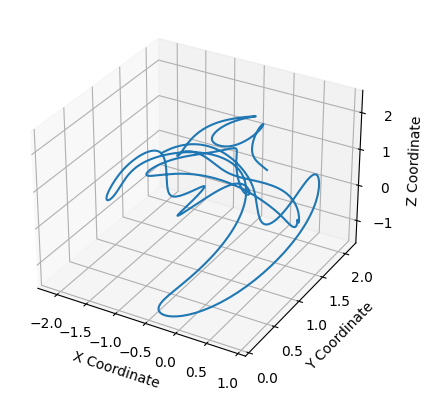

In [105]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)  # Assuming these keys exist
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
plt.show()


In [106]:
poses.shape

(900, 4, 4)

In [107]:
poses = poses.reshape(-1, 16)

In [108]:
np.savetxt(pose_store,poses,)